In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pretrained_model_name = 'microsoft/trocr-small-printed'

processor = TrOCRProcessor.from_pretrained(pretrained_model_name)
model = VisionEncoderDecoderModel.from_pretrained(pretrained_model_name).to(device)

def read_and_show(image_path):
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image

def ocr(image, processor, model):
    pixel_values = processor(image, return_tensors='pt').pixel_values.to(device)

    generated_ids = model.generate(pixel_values)

    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


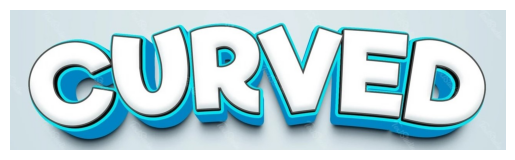

Dự đoán: GOOD


In [9]:
image_path = 'ImageTest/7.jpeg'

image = read_and_show(image_path)

predicted_text = ocr(image, processor, model)
print(f"Dự đoán: {predicted_text}")

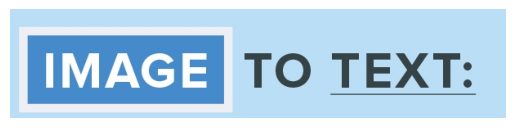

Dự đoán: LUNG: TO TEXT:


In [8]:
image_path = 'ImageTest/8.jpg'

image = read_and_show(image_path)

predicted_text = ocr(image, processor, model)
print(f"Dự đoán: {predicted_text}")